# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [1]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [2]:
def image_generator(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.float32)
    image[y1:y2, x1:x2] = 1
    image = itk.image_view_from_array(image)
    return image

## Affine Test

In [3]:
# Create test images
fixed_image_affine = image_generator(25,75,25,75)
moving_image_affine = image_generator(1,71,1,91)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine',4)
default_affine_parameter_map['FinalBSplineInterpolationOrder'] = ['0']
parameter_object.AddParameterMap(default_affine_parameter_map)

In [4]:
# Call registration function
result_image_affine, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_affine, moving_image_affine,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Affine Test

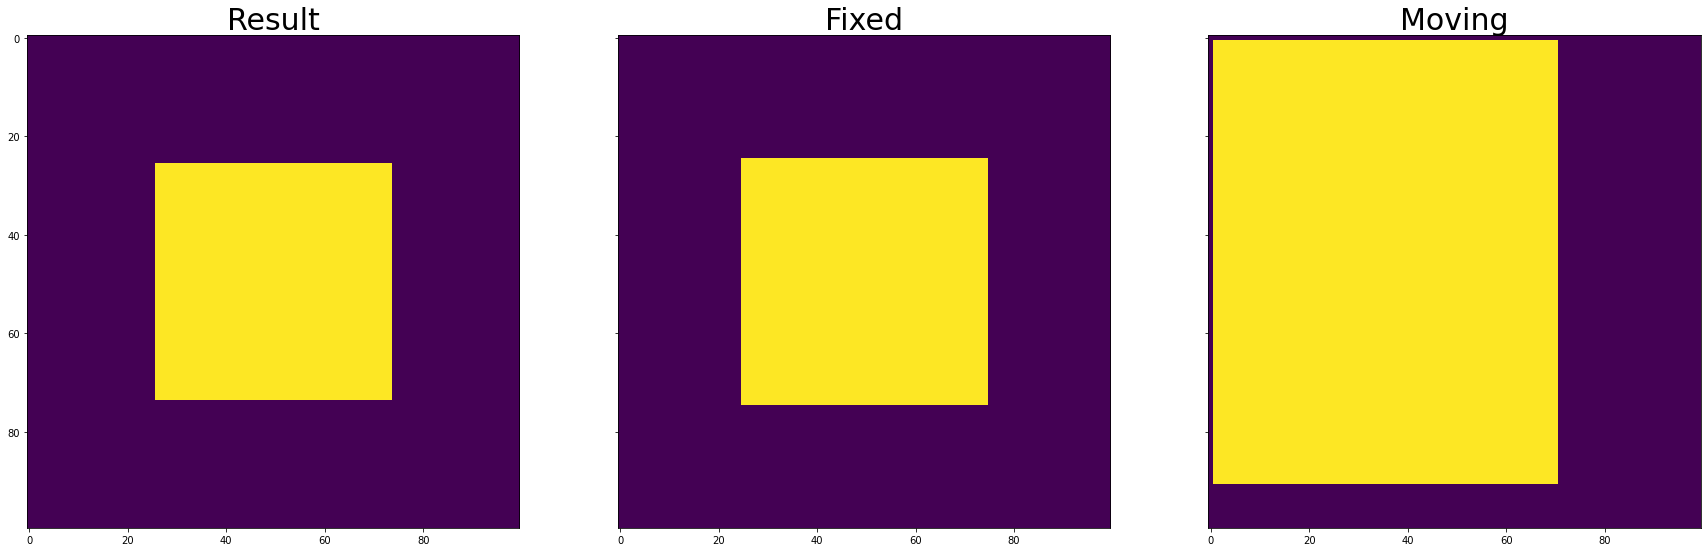

In [5]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_affine)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_affine)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_affine)
axs[2].set_title('Moving', fontsize=30)
plt.show()